This notebook is the report for the data challenge of BGDIA704.

# Introduction

# I. Try first

If it's easy, one should immediatly go for off-the-shelf solutions. Turns out it is easy nowadays with HuggingFace as we saw in our first data challenge.

Without any clue, let's just train a SOTA (state-of-the-art) DNN on our task and see how it goes.

Well 90% accuracy on the test set is pretty good ! Now to improve on that let's dive in on what we are really trying to achieve.

# II. Know your data

Let's have a look at the pictures we are dealing with.

In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import os

/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset_path = "../data/train/dataset.hf"
dataset = load_from_disk(dataset_path)
dataset = dataset.shuffle(seed=42)

In [5]:
# Get images and labels 
images = dataset['image']
labels = dataset['label']

In [6]:
images_0 = []
images_1 = []
for image, label in zip(images, labels):
    if label == 0:
        images_0.append(image)
    else:
        images_1.append(image)

In [8]:
save_directory = '../fig'

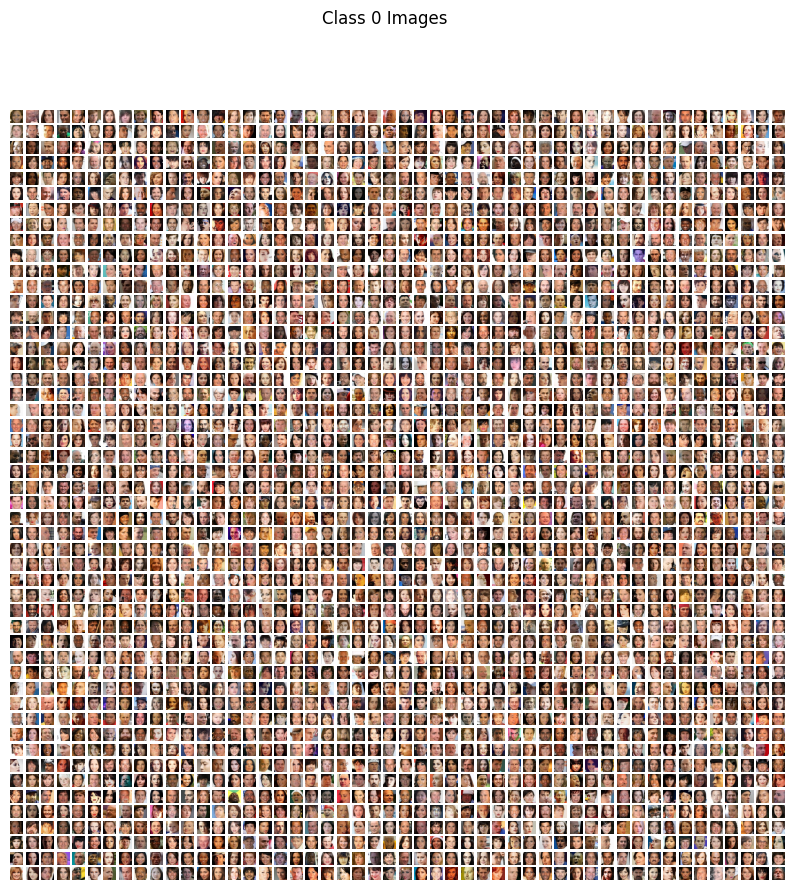

In [9]:
fig, axes = plt.subplots(50, 50, figsize=(10, 10))

# Plot class 0 images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_0[i], cmap='gray')
    ax.axis('off')

plt.suptitle('Class 0 Images')

# Save the plot as an image file
plt.savefig(os.path.join(save_directory, 'class0_image_grid.png'))

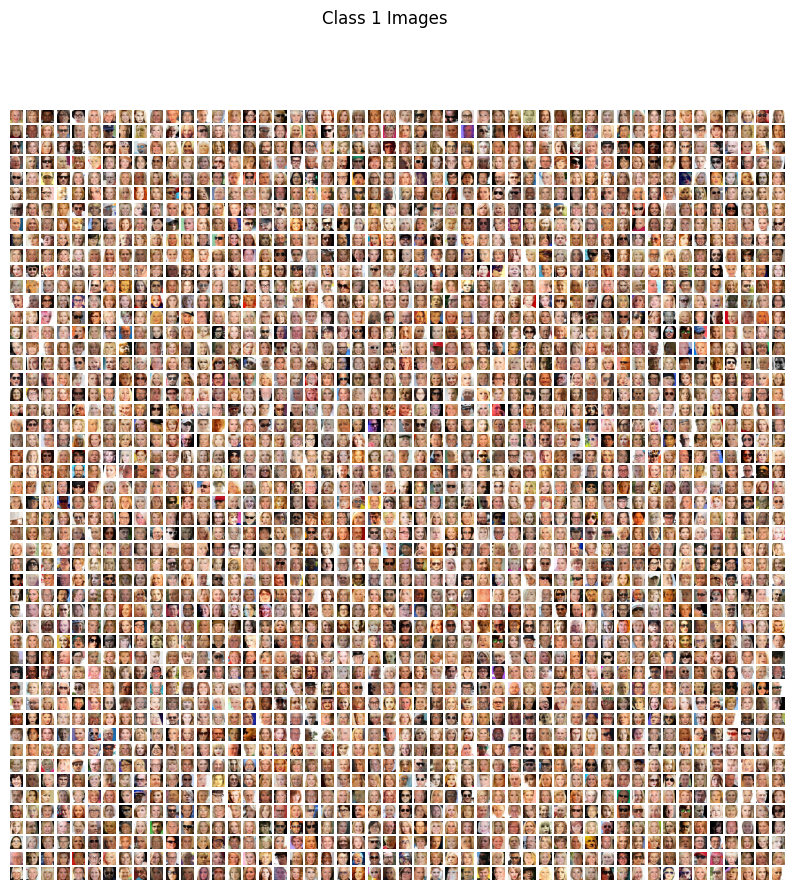

In [10]:
# Create a new figure for class 2 images
fig, axes = plt.subplots(50, 50, figsize=(10, 10))

# Plot class 1 images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_1[i], cmap='gray')
    ax.axis('off')

plt.suptitle('Class 1 Images')

# Save the plot as an image file
plt.savefig(os.path.join(save_directory, 'class1_image_grid.png'))

I don't know about you but what I clearly see is that 0 are just people but 1 are either blond* or wearing glasses.

*female mainly but there is certainly a bias toward blond females, male do not dye their hair as often

# III. Know your model

All right, we have an idea of what we are looking for, but is our model agreeing with us ?
Our conclusion is very visual, we can attempt to use a XAI (explanable AI) visualisation technic to check wether our model agree with us or not.

In [17]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torchvision.transforms import ToPILImage
from torch import from_numpy
from pytorch_grad_cam import run_dff_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from gradcam import category_name_to_index, reshape_transform_vit_huggingface

In [18]:
checkpoint = "../models/checkpoint-7221"
model = ViTForImageClassification.from_pretrained(
        checkpoint,
        num_labels=2,
    )
feature_extractor = ViTFeatureExtractor.from_pretrained(
        checkpoint
    )

/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum

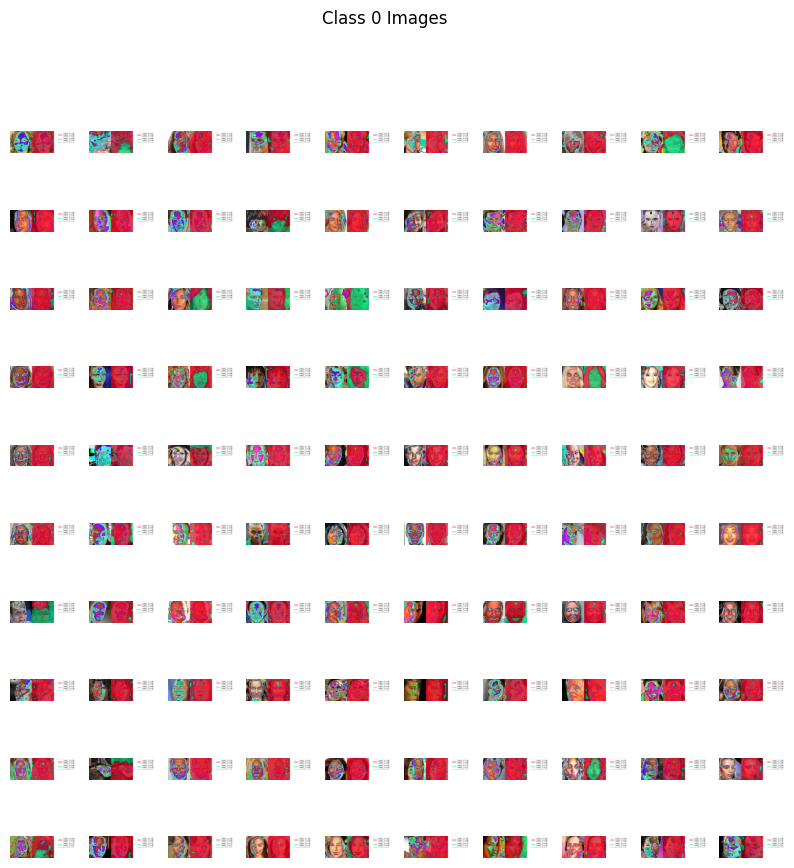

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

to_pil = ToPILImage()

# Plot class 0 images
for i, ax in enumerate(axes.flat):

    # Prepare the image
    features = feature_extractor(images_0[i])
    img_tensor = from_numpy(features['pixel_values'][0])
    img_pil = to_pil(img_tensor)
    # Set the layer to prob
    target_layer_dff = model.vit.layernorm
    target_layer_gradcam = model.vit.encoder.layer[-2].output
    # Set targets
    targets_for_gradcam = [ClassifierOutputTarget(category_name_to_index(model, "LABEL_0")),
                       ClassifierOutputTarget(category_name_to_index(model, "LABEL_1"))]
    dff_image = run_dff_on_image(model=model,
                          target_layer=target_layer_dff,
                          classifier=model.classifier,
                          img_pil=img_pil,
                          img_tensor=img_tensor,
                          reshape_transform=reshape_transform_vit_huggingface,
                          n_components=2,
                          top_k=2)
    ax.imshow(dff_image, cmap='gray')
    ax.axis('off')

plt.suptitle('Class 0 Images')

# Save the plot as an image file
plt.savefig(os.path.join(save_directory, 'model_class0_image_grid.png'))

/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/users/jma-21/BGDIA704 - Machine learning avancé/DataChallenge/face-classification/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum

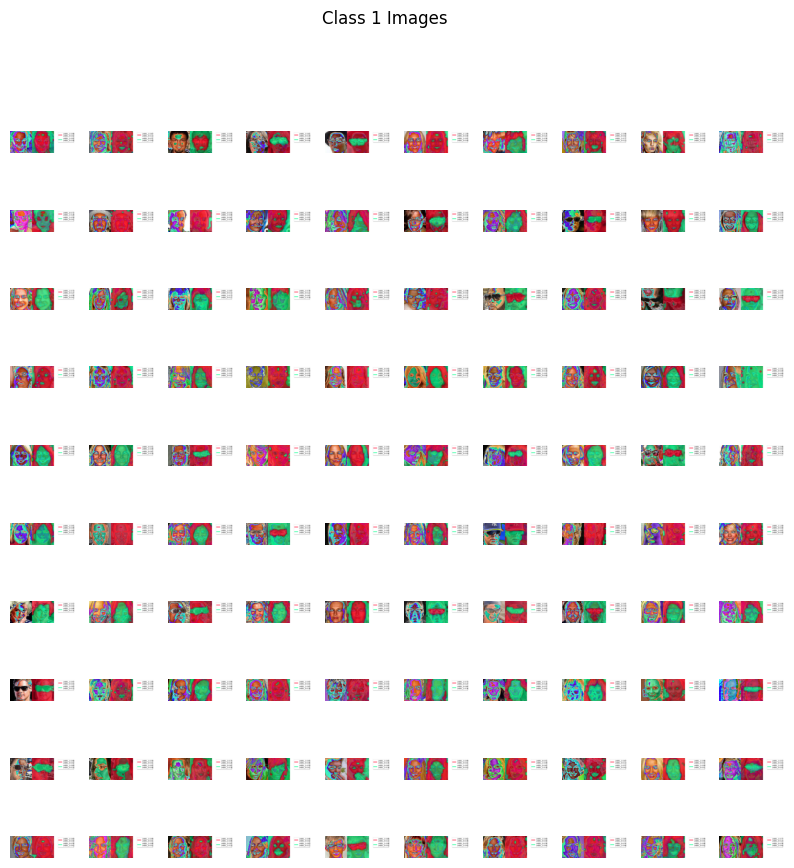

In [22]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

to_pil = ToPILImage()

# Plot class 1 images
for i, ax in enumerate(axes.flat):

    # Prepare the image
    features = feature_extractor(images_1[i])
    img_tensor = from_numpy(features['pixel_values'][0])
    img_pil = to_pil(img_tensor)
    # Set the layer to prob
    target_layer_dff = model.vit.layernorm
    target_layer_gradcam = model.vit.encoder.layer[-2].output
    # Set targets
    targets_for_gradcam = [ClassifierOutputTarget(category_name_to_index(model, "LABEL_0")),
                       ClassifierOutputTarget(category_name_to_index(model, "LABEL_1"))]
    dff_image = run_dff_on_image(model=model,
                          target_layer=target_layer_dff,
                          classifier=model.classifier,
                          img_pil=img_pil,
                          img_tensor=img_tensor,
                          reshape_transform=reshape_transform_vit_huggingface,
                          n_components=2,
                          top_k=2)
    ax.imshow(dff_image, cmap='gray')
    ax.axis('off')

plt.suptitle('Class 1 Images')

# Save the plot as an image file
plt.savefig(os.path.join(save_directory, 'model_class1_image_grid.png'))

While it is far from perfect, there is definetly something going on with the glasses and the hair. And they are the main reasons to classify an image as label 1.

# IV. Data augmentation

So there are funny augmentations we can do here. \
Instead of the traditionnal ones that might change the meaning of our pictures. \
We can simply, well, disguise them with wigs and glasses like undercover spies !

One other thing we might do is use the test data by forcing its class to 1. But that might be impractical if we add glasses to someone with glasses...

# V. Improve training

What's more we can go to anytype of 1 at will, it enables us to do something interesting.\
We can follow the performance curve on only our synthetic data, and add the real ones later on.\
And we can monitor the performances on some particular type of people. \

# VI. Conclusion 